In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Régression linéaire

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(seed=None)

Chargement des données
- Les données "diabetes" sont décrites ici https://archive.ics.uci.edu/ml/datasets/Diabetes (voir ci-dessous)
- Ajoutez le code nécessaire pour ne conserver que les deux premières caractéristiques des données
- On cherchera à prédire la deuxième à partir de la première

In [46]:
from IPython.display import HTML
HTML('<iframe src=https://archive.ics.uci.edu/ml/datasets/Diabetes width=700 height=350></iframe>')

In [47]:
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)
print(diabetes.data)

(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [48]:
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]
# Split the data into training/testing sets
diabetes_X_test = diabetes_X_temp[-20:]
# Split the targets into training/testing sets
diabetes_y_test = diabetes.target[-20:]


print(diabetes_X_test.shape)
print(diabetes_y_test.shape)
print(diabetes_X_temp.shape)
print(diabetes_X.shape)

(20, 1)
(20,)
(442, 1)
(442, 1, 10)


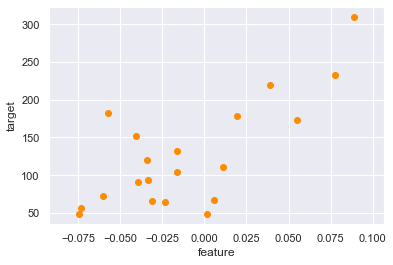

In [49]:
#Plotter les données à l'aide de plot.scatter 
plt.scatter(diabetes_X_test, diabetes_y_test, c='darkorange')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

# Apprendre un modèle de régression linéaire et plotter la solution

In [53]:
# Construire aléatoirement un ensemble d'apprentissage de taille TrainSize = 20
# Mettre les entrées dans diabetes_X_train et les sorties désirées dans diabetes_y_train
diabetes_X_train, X_test, diabetes_y_train, y_test = train_test_split(diabetes_X_temp, diabetes.target, test_size=0.10)
print(diabetes_X_train.shape)
print(diabetes_y_train.shape)
print(X_test.shape)
print(y_test.shape)

(397, 1)
(397,)
(45, 1)
(45,)


In [55]:
# Apprendre un modèle de régression linéaire (linear_model.LinearRegression de sklearn) sur vos données 
# d'apprentissage à l'aide de la méthode fit
reg = LinearRegression()
reg.fit(diabetes_X_train, diabetes_y_train)
print(reg)
print(reg.coef_)
print(reg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[973.92283126]
151.6397197703474


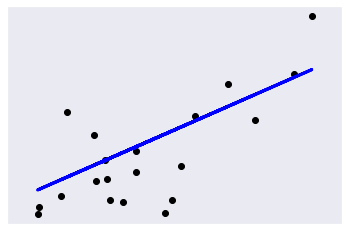

In [18]:
# Sur une figure afficher les points de train et la droite correpsondant à la droite de régression apprise

#fig, ax = plt.subplots()
#x_min, x_max = diabetes_X_train[:,0].min() - .5, diabetes_X_train[:,0].max() + .5
#y_min, y_max = diabetes_X_train[:,1].min() - .5, diabetes_X_train[:,1].max() + .5
#xs = np.arange(x_min, x_max, 0.5)
#plt.scatter(diabetes_X_train[0], diabetes_X_train[1], c=diabetes_y_train, cmap = plt.cm.prism)
#ys = (x * reg.coef_ + reg.intercept_)
#plt.plot(xs,ys,hold=True)

diabetes_y_pred = reg.predict(diabetes_X_test)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Multiples modèles de régression appris sur des ensembles d'apprentissage différents

In [19]:
# Reproduire les mêmes étapes que précedemmebt mais cette fois au sein d'une boucles que vous 
# répeterez un nombre Nexpes de fois.
# Affichez dabns une meme figure les droites de régression apprises sur l'ensemble des itérations
def boucle_reg(n, t_size = 0.1):
    i = 0
    while i < n:
        diabetes_X_train, X_test, diabetes_y_train, y_test = train_test_split(diabetes_X_temp, diabetes.target, test_size=t_size)
        reg = LinearRegression()
        reg.fit(diabetes_X_train, diabetes_y_train)
        diabetes_y_pred = reg.predict(diabetes_X_test)
        plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
        plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
        plt.xticks(())
        plt.yticks(())
        plt.show()
        i+=1

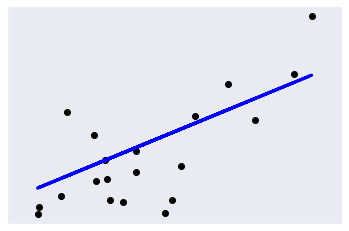

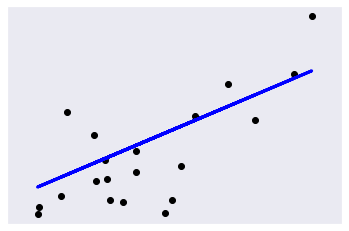

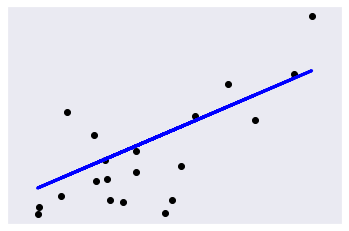

In [20]:
boucle_reg(3)

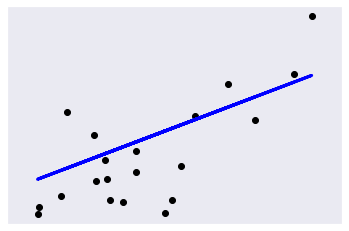

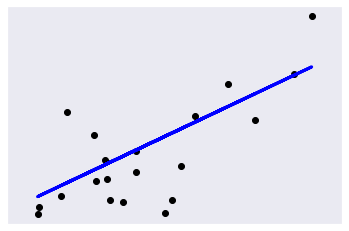

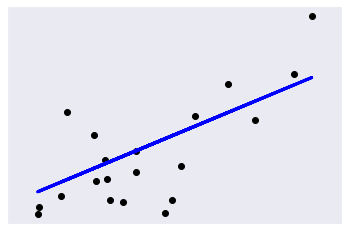

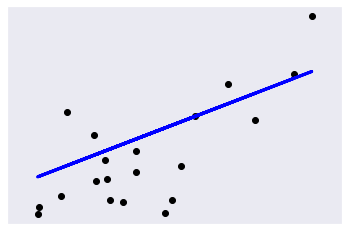

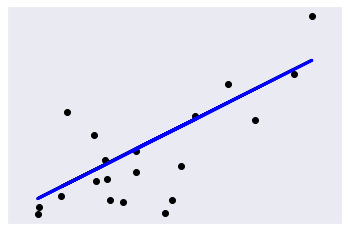

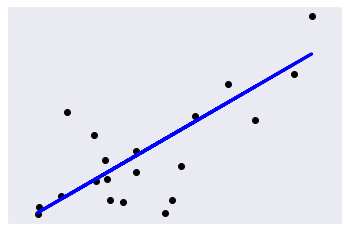

In [21]:
# Reproduire les expériences précédentes avec différentes tailles de l'ensemble d'apprentissage
boucle_reg(3, 0.4)
boucle_reg(3, 0.9)

# Régression polynomiale

## Régression quadratique

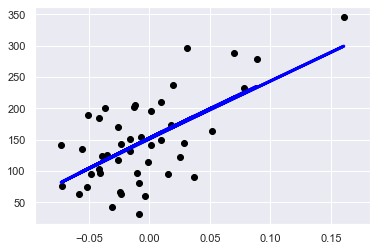

In [77]:
# Apprendre un modèle de régression quadratique en transformant les données d'entrée
# et en leur ajoutant les termes du second ordre des entrées, pour un ensemble d'apprentissage
poly = PolynomialFeatures(2)
output_df = poly.fit_transform(diabetes_X_temp)
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(output_df, diabetes.target, test_size=0.10)
reg = LinearRegression()
reg.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = reg.predict(diabetes_X_test)
plt.scatter(np.array(diabetes_X_test)[:,1], diabetes_y_test,  color='black')
plt.plot(np.array(diabetes_X_test)[:,1], diabetes_y_pred, color='blue', linewidth=3)
plt.show()